In [16]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons

iris = datasets.load_iris()
X = iris["data"][:, (1, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([0.])

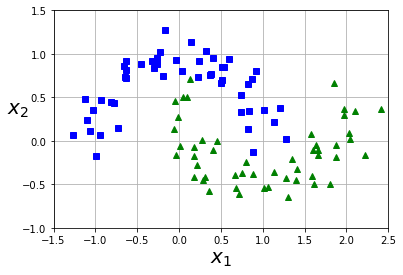

In [17]:
import matplotlib
import matplotlib.pyplot as plt
#narrow strea returns two nump arrays
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
#fake data with low nice the i.e 0.1 and we can changes the data points also 
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

[[ 1.61383833 -0.49115086]
 [ 0.08984723  0.50439056]
 [ 0.74721047 -0.36911116]
 [-1.10174514  0.23685641]
 [-0.72871455  0.14652347]
 [-0.65891281  0.857088  ]
 [ 0.22828266  0.73453868]
 [ 1.39439184 -0.45063627]
 [ 0.87158283  0.70852888]
 [ 0.88304472 -0.12658445]
 [ 0.38220326  0.76957897]
 [-0.32279169  0.92145523]
 [ 1.29900621 -0.64914275]
 [-0.63569974  0.91873422]
 [ 1.96899387  0.297549  ]
 [ 1.21073294  0.37721455]
 [ 1.13998191 -0.36088456]
 [ 1.06805159 -0.53460667]
 [ 0.49598571  0.66135542]
 [-0.26038715  0.88295876]
 [-0.06516219  0.13092506]
 [ 1.87005845 -0.18659309]
 [ 0.03146515  0.79868048]
 [-1.03151461  0.35788726]
 [ 0.45814234  0.00308109]
 [ 0.40767679  0.9574049 ]
 [-0.9379972   0.46846678]
 [ 2.02675758  0.09006383]
 [ 0.73867736  0.52356398]
 [ 0.71349755 -0.61055519]
 [ 0.92445501  0.79897643]
 [-1.05805492  0.1152524 ]
 [ 1.80904221 -0.49580332]
 [-0.17181754  1.27111359]
 [ 2.22167197 -0.16625369]
 [ 0.8346617   0.34040713]
 [ 0.28332589 -0.45537977]
 

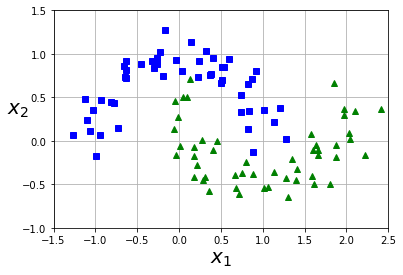

In [21]:
import matplotlib
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
print(X)
print(y)
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [37]:
from sklearn.svm import SVC
#X_train, X_test, y_train, y_test = X[:70], X[70:],y[:70],y[70:]
# weights of poly kernak of svc is controlled by coef parameter
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=100)) # with diff kernals and by changing c value. 
    ])
poly_kernel_svm_clf.fit(X, y)
a = poly_kernel_svm_clf.predict(X_test)


In [38]:
from sklearn.svm import SVC
# weights of poly kernak of svc is controlled by coef parameter
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=1)) # with diff kernals and by changing c value. 
    ])
poly100_kernel_svm_clf.fit(X, y)
b =poly100_kernel_svm_clf.predict(X_test)



In [39]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
poly_kernel_svm_clf.fit(X_train,y_train)
poly100_kernel_svm_clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, coef0=1, kernel='poly'))])

In [40]:
from sklearn.metrics import confusion_matrix
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(confusion_matrix(y_test,poly_kernel_svm_clf.predict(x_test)))
print(confusion_matrix(y_test,poly100_kernel_svm_clf.predict(x_test)))

[[11  0]
 [ 1 18]]
[[10  1]
 [ 1 18]]


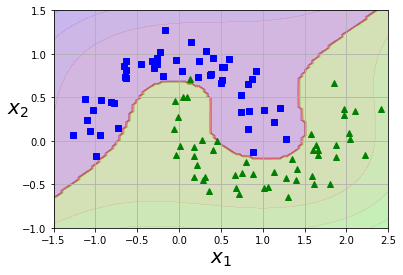

In [41]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

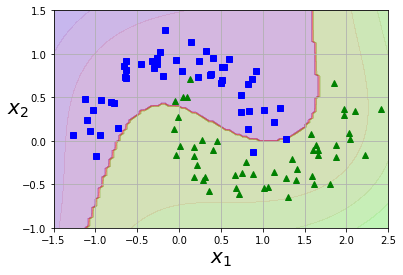

In [42]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

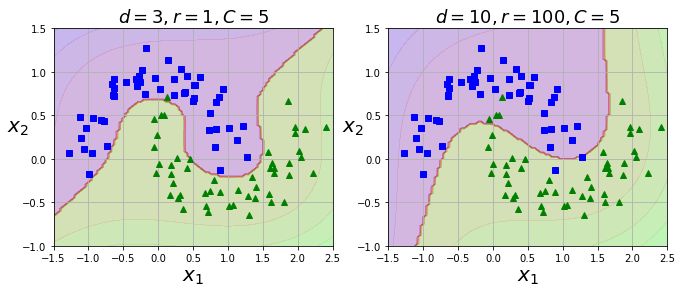

In [43]:


plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.show()

Inference : we can see that from two of the svm models we can say that the models on the right is the best model. As the first model will be overfitted.